In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import test set:


In [7]:
# full train set:
train_df = pd.read_csv("../data/train_clean.csv")

# full test set: 
test_df  = pd.read_csv("../data/test_clean.csv")

## Test on best model:

### Best model for SVC: 
#### (in case this is the best prediction model of of the 4)

In [8]:
# full train set:
train_df = pd.read_csv("../data/train_clean.csv")

# full test set: 
test_df  = pd.read_csv("../data/test_clean.csv")

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# same cols:
text_col = "comment_text"

# target:
for df in (train_df, test_df):
    df[text_col] = df[text_col].fillna("").astype(str)
    df["label"] = df["rating_rejected"].astype(int)

y_train_full = train_df["label"]
y_test_final = test_df["label"]

cols = [
    c for c in train_df.columns
    if c not in [text_col, "label", "rating_rejected"]
]

print("Columns in cleaned train_df:", train_df.columns.tolist())
print("Numeric feature columns (first few):", cols[:10])


# train & test data:
train_df[cols] = train_df[cols].apply(pd.to_numeric, errors="coerce").fillna(0)
test_df[cols]  = test_df[cols].apply(pd.to_numeric, errors="coerce").fillna(0)

X_train_full = train_df[[text_col] + cols]
X_test_final = test_df[[text_col] + cols]

Columns in cleaned train_df: ['comment_text', 'funny', 'wow', 'sad', 'likes', 'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat', 'toxicity_annotator_count', 'rating_rejected', 'label']
Numeric feature columns (first few): ['funny', 'wow', 'sad', 'likes', 'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack']


In [11]:
# final model:
final_preprocess = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(
            stop_words="english",
            ngram_range=(1, 1),  # best
            min_df=10            # best
        ), text_col),
        ("num", StandardScaler(), cols),
    ]
)

final_svm = Pipeline([
    ("preprocess", final_preprocess),
    ("svm", LinearSVC(C=1, random_state=42, max_iter=10000))  # best C
])

# fit final model on ALL training data:
final_svm.fit(X_train_full, y_train_full)

# predict & scores:
y_test_pred = final_svm.predict(X_test_final)

print("Final test accuracy:", accuracy_score(y_test_final, y_test_pred))
print("\nClassification report on test set:\n")
print(classification_report(y_test_final, y_test_pred))

Final test accuracy: 0.9377252020867682

Classification report on test set:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    372787
           1       0.68      0.10      0.18     26299

    accuracy                           0.94    399086
   macro avg       0.81      0.55      0.57    399086
weighted avg       0.92      0.94      0.92    399086



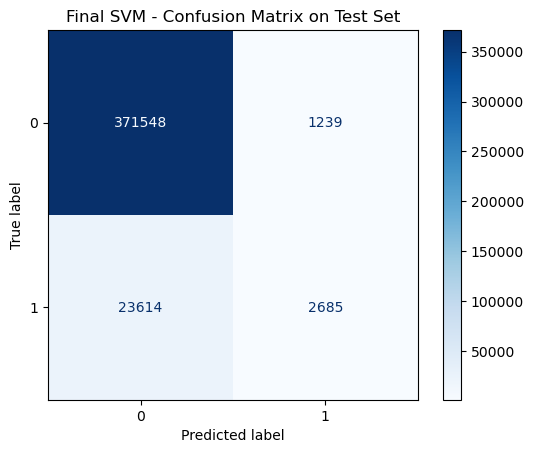

In [12]:
# confusion matrix for best SVC model:
cm = confusion_matrix(y_test_final, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Final SVM - Confusion Matrix on Test Set")
plt.show()